In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
from skimage.feature import hog
from skimage import exposure

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

<ipython-input-8-c2084f309b19>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),


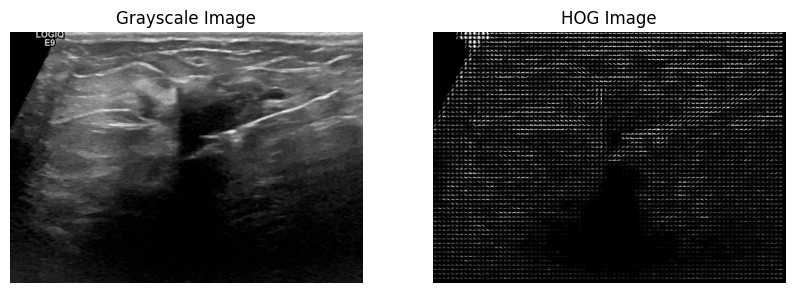

In [ ]:
# Load the grayscale image
gray = cv2.imread('/content/drive/MyDrive/US dataset/malignant/malignant (69).png', 0)

# Compute the HOG features
features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True, multichannel=False)

# Rescale the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Image')
plt.axis('off')

plt.show()

Try to enhance the contrast

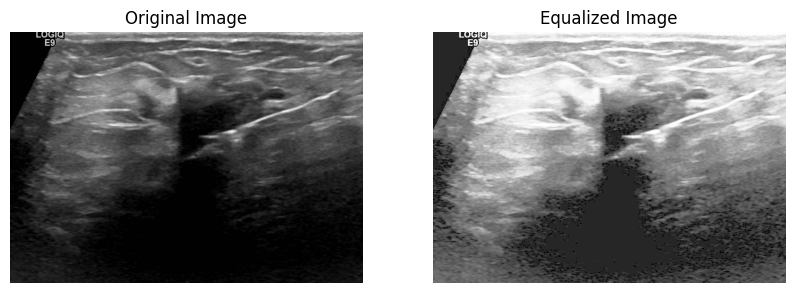

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/malignant/malignant (69).png', 0)  # Load as grayscale

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

<ipython-input-68-3cf5133f880d>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(equalized_image, orientations=9, pixels_per_cell=(8, 8),


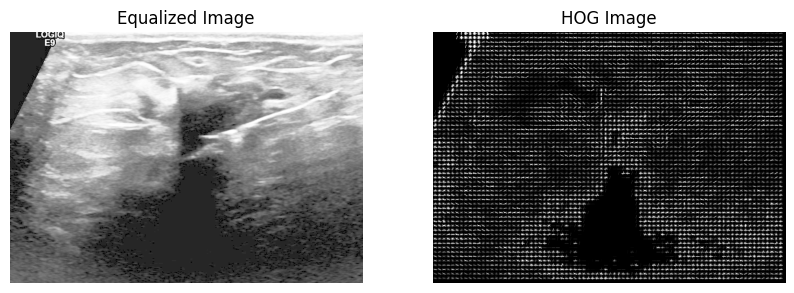

In [ ]:
# Compute the HOG features
features, hog_image = hog(equalized_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True, multichannel=False)

# Rescale the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Image')
plt.axis('off')

plt.show()

Images with a lot of black backgroud are bad recognized

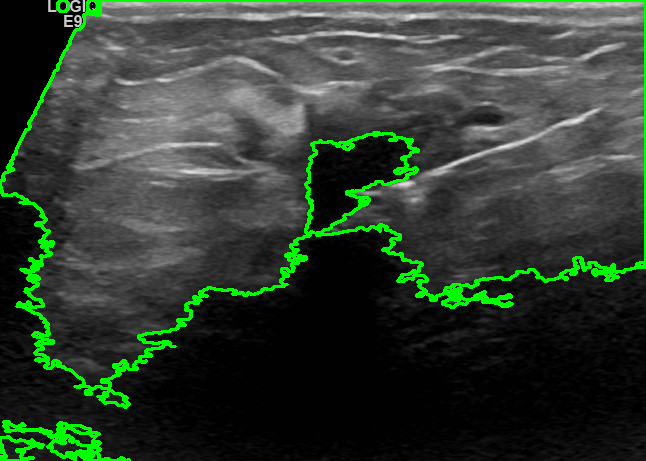

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/malignant/malignant (69).png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set a threshold for the pixel intensity to detect black areas
threshold_value = 25  # Adjust this value as needed
_, binary_image = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Set an appropriate area threshold for detection
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Draw contours in green

# Display the original image with detected black areas
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

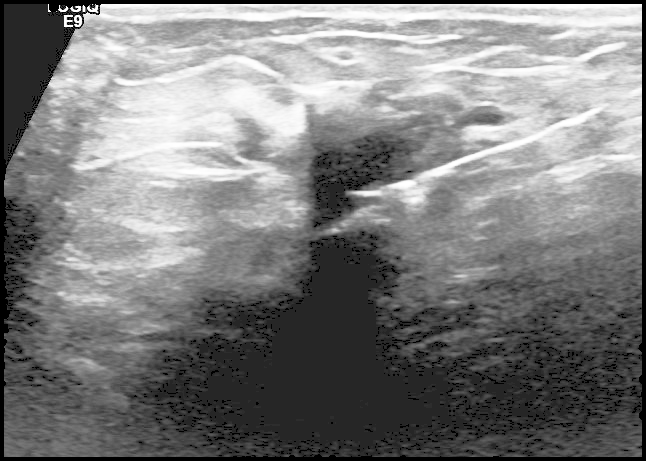

In [ ]:
# Set a threshold for the pixel intensity to detect black areas
#threshold_value = 25  # Adjust this value as needed
#_, binary_image = cv2.threshold(equalized_image, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(equalized_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Set an appropriate area threshold for detection
        cv2.drawContours(equalized_image, [contour], -1, (0, 255, 0), 2)  # Draw contours in green

# Display the original image with detected black areas
cv2_imshow(equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## If the image has a pictogram, this algorithm does not recognize whats inside.

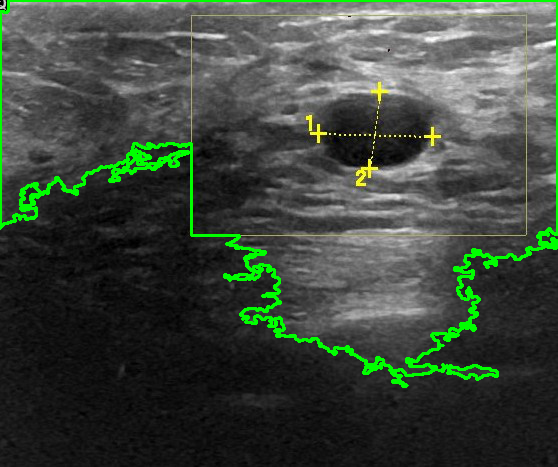

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/benign/benign (6).png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set a threshold for the pixel intensity to detect black areas
threshold_value = 45  # Adjust this value as needed
_, binary_image = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Set an appropriate area threshold for detection
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Draw contours in green

# Display the original image with detected black areas
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Flipping colors

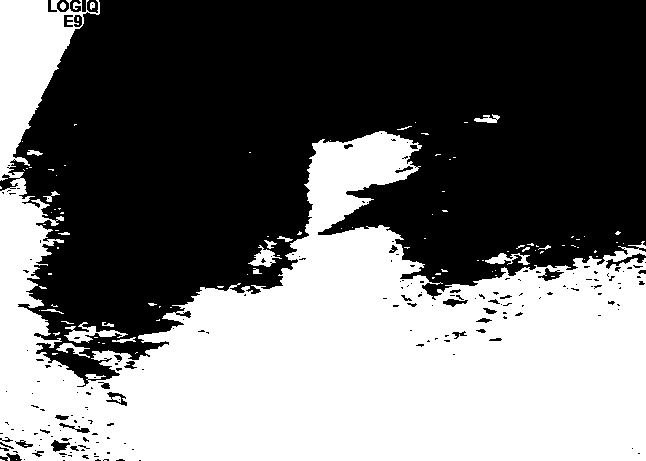

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/malignant/malignant (69).png', 0)  # Ensure the image is in grayscale

# Apply image processing techniques for tumor detection
# For example, you can use thresholding or more advanced techniques like edge detection or segmentation

# Apply thresholding to isolate the tumor region
_, binary_image = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Invert the binary image to have the tumor region in white
inverted_binary_image = cv2.bitwise_not(binary_image)

# Create a white background image
white_image = np.full_like(image, 255)

# Copy the tumor region onto the white background
result = cv2.bitwise_and(white_image, white_image, mask=inverted_binary_image)

# Display the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

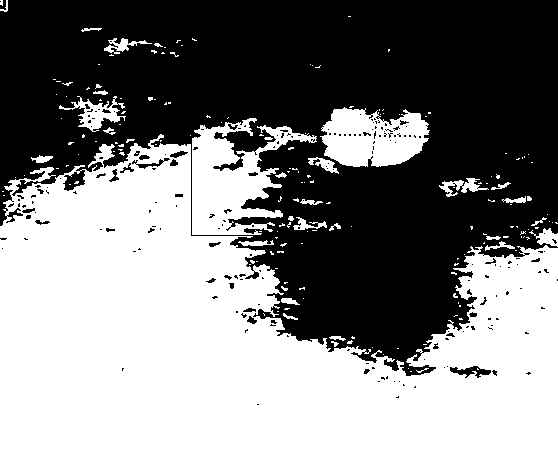

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/benign/benign (6).png', 0)  # Ensure the image is in grayscale

# Apply image processing techniques for tumor detection
# For example, you can use thresholding or more advanced techniques like edge detection or segmentation

# Apply thresholding to isolate the tumor region
_, binary_image = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Invert the binary image to have the tumor region in white
inverted_binary_image = cv2.bitwise_not(binary_image)

# Create a white background image
white_image = np.full_like(image, 255)

# Copy the tumor region onto the white background
result = cv2.bitwise_and(white_image, white_image, mask=inverted_binary_image)

# Display the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

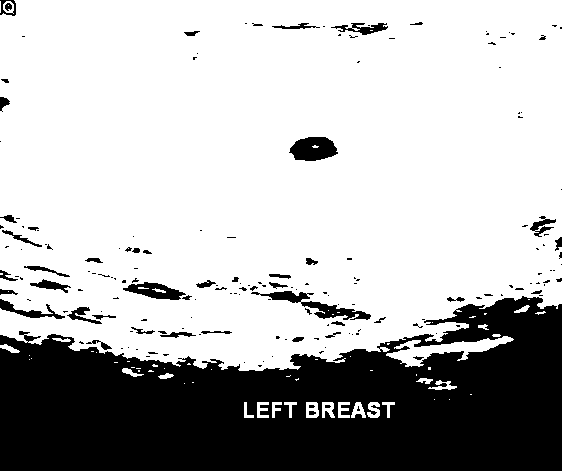

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/benign/benign (1).png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert the binary image to have the tumor region in white
inverted_binary_image = cv2.bitwise_not(binary_image)

# Apply thresholding to create a mask
_, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the mask
cv2_imshow(mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

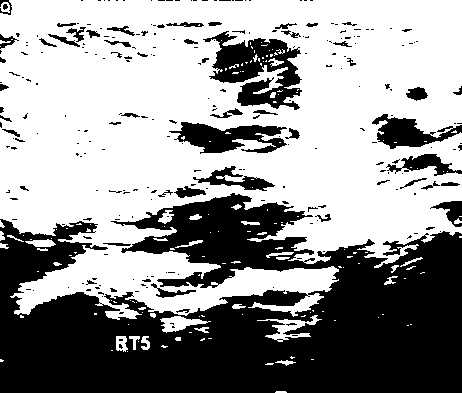

-1

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/malignant/malignant (10).png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert the binary image to have the tumor region in white
inverted_binary_image = cv2.bitwise_not(binary_image)

# Apply thresholding to create a mask
_, mask = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the mask
cv2_imshow(mask)
cv2.waitKey(0)

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/malignant/malignant (10).png')

# Print the original image dimensions
print("Original Image Shape:", image.shape)

Original Image Shape: (393, 462, 3)


In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/US dataset/malignant/malignant (100).png')

# Print the original image dimensions
print("Original Image Shape:", image.shape)

Original Image Shape: (476, 557, 3)


# Reshaping images

In [ ]:
# Input and output directories for benign images
input_directory = '/content/drive/MyDrive/US dataset/Filtered-data/benign-filtered'  # Replace with the path to your input directory
output_directory = '/content/drive/MyDrive/US dataset/Filtered-data/Reshape/benign_filtered_reshape'  # Replace with the path to your output directory

# Desired dimensions for the resized images
new_width = 256
new_height = 256

# Iterate through each file in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Assuming images are either JPG or PNG
        # Load the image
        image = cv2.imread(os.path.join(input_directory, filename))

        # Resize the image
        resized_image = cv2.resize(image, (new_width, new_height))

        # Save the resized image to the output directory
        cv2.imwrite(os.path.join(output_directory, filename), resized_image)

In [ ]:
# Input and output directories for malignant images
input_directory = '/content/drive/MyDrive/US dataset/Filtered-data/malignant-filtered'  # Replace with the path to your input directory
output_directory = '/content/drive/MyDrive/US dataset/Filtered-data/Reshape/malignant_filtered_reshape'  # Replace with the path to your output directory

# Desired dimensions for the resized images
new_width = 256
new_height = 256

# Iterate through each file in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Assuming images are either JPG or PNG
        # Load the image
        image = cv2.imread(os.path.join(input_directory, filename))

        # Resize the image
        resized_image = cv2.resize(image, (new_width, new_height))

        # Save the resized image to the output directory
        cv2.imwrite(os.path.join(output_directory, filename), resized_image)

In [ ]:
# Input and output directories for normal images
input_directory = '/content/drive/MyDrive/US dataset/Filtered-data/normal-filtered'  # Replace with the path to your input directory
output_directory = '/content/drive/MyDrive/US dataset/Filtered-data/Reshape/normal_filtered_reshape'  # Replace with the path to your output directory

# Desired dimensions for the resized images
new_width = 256
new_height = 256

# Iterate through each file in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Assuming images are either JPG or PNG
        # Load the image
        image = cv2.imread(os.path.join(input_directory, filename))

        # Resize the image
        resized_image = cv2.resize(image, (new_width, new_height))

        # Save the resized image to the output directory
        cv2.imwrite(os.path.join(output_directory, filename), resized_image)